In [1]:
#hide
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns
import random
import altair as alt

In [4]:
#hide
import warnings
warnings.filterwarnings("ignore")

# "Central Limit Theorem & z-statistics"
> "Beginner's guide to central limit theorem and z-statistics"

- author: Jae Kim
- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- hide: false

// width of the content area
// can be set as "px" or "%"
$content-width:    600px;
$on-palm:          600px;
$on-laptop:        600px;
$on-medium:        600px;
$on-large:         600px;

# Summary

<font size="5">Central Limit Theorem</font>

1) Many statistical tests and scores (including t-test and z-score) **assume that the population distribution follows normal distribution.**

2) However, many real life data do not follow normal distribution.

3) Central limit theorem (CLT) allows you to assume that the mean of any data is normally distributed **as long as your sample size is large enough.**

4) Skewness and kurtosis can be used to test the normality of a distribution. **Normal distribution has both skewness and kurtosis of 0.** If your distribution has skewness and kurtosis significantly different from 0, you may want to increase your sample size. For formal normality test using skewness and kurtosis, check out [Jarque–Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test). 

5) The more samples you take, the closer the distribution of means follow normal distribution. But increasing the sample size is often very expensive in real life. Imagine having to increase the size of your clinical trial. So there is a trade off, you can either ensure the normality by increasing the sample size or risk working with a distribution that may differ significantly from normal distribution.

**You barely have a dataset containing the entire population! All these statistical procedures to approximate the population data from whatever data we have access to!**

For formal proof of central limit theorem, check [this paper.](https://www.cs.toronto.edu/~yuvalf/CLT.pdf)

<font size="5">Normal Distribution (Gaussian Distribution)</font>

Normal distribution is perhaps one of the most widely used distributions. It has many unique properties but ones that I find relevant to our lectures are listed below.

1) Normal distribution is defined by two parameters, mean ($\mu$) and standard variation ($\sigma$). **Once you know the two parameters, you can map the entire probability distribution function (pdf)**.

$$
x \backsim N(\mu, \sigma^2)
$$
Above expression simply means random variable x is distributed according to a normal distribution with mean $\mu$ and variance $\sigma^2$ (variance = $\text{standard deviation}^2$). Although some mathematical expressions can
look intimidating, most of them have really simple meaning.
    
$$
p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left({\frac{x-\mu}{\sigma}}\right)^2}
$$
Above is the pdf of a normal distribution. $\pi$ and $e$ are constants, meaning $p(x)$ only depends on $x, \mu$ and $\sigma$.
    
2) **68, 95, 99.7 rule.**

Approximately 68%, 95% and 99.7% of values in the distribution are within 1, 2 and 3 SDs of the mean, i.e., above or below. This allows easier probablistic interpretation of data (more in the next paragraph).

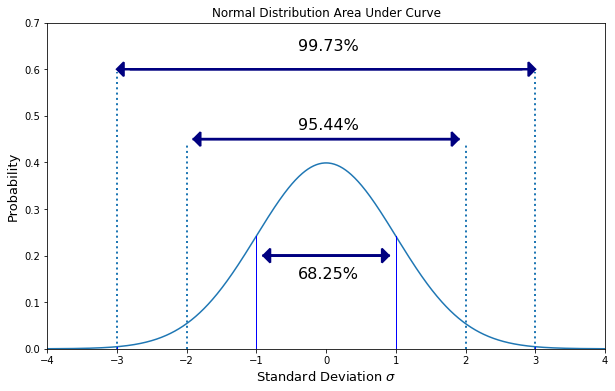

In [5]:
#collapse
x_domain = np.arange(-4, 4, 0.01)
norm = scipy.stats.norm(loc = 0, scale = 1)
y = norm.pdf(x_domain)

plt.figure(figsize=(10, 6))
plt.plot(x_domain, y)
ylim = 0.7
plt.ylim(0, ylim)
plt.xlim(-4, 4)
plt.axvline(x = 1, ymax=norm.pdf(1)/ylim, lw = 1, color = 'blue')
plt.axvline(x = -1, ymax=norm.pdf(-1)/ylim, lw = 1, color = 'blue')
plt.axvline(x = 2, ymax=0.63, lw = 2, linestyle = ':')
plt.axvline(x = -2, ymax=0.63, lw = 2, linestyle = ':')

plt.axvline(x = 3, ymax=0.85, lw = 2, linestyle = ':')
plt.axvline(x = -3, ymax=0.85, lw = 2, linestyle = ':')

plt.axvline(x = 3, ymax=norm.pdf(3)/ylim, lw = 1, color = 'blue')
plt.axvline(x = -3, ymax=norm.pdf(-3)/ylim, lw = 1, color = 'blue')

plt.arrow(-0.9, 0.2, 1.8, 0, head_width=0.03, head_length=0.1, linewidth=2, length_includes_head=True, color = 'navy')
plt.arrow(0.9, 0.2, -1.8, 0, head_width=0.03, head_length=0.1, linewidth=2, length_includes_head=True, color = 'navy')

plt.arrow(-1.9, 0.45, 3.8, 0, head_width=0.03, head_length=0.1, linewidth=2, length_includes_head=True, color = 'navy')
plt.arrow(1.9, 0.45, -3.8, 0, head_width=0.03, head_length=0.1, linewidth=2, length_includes_head=True, color = 'navy')

plt.arrow(-2.8, 0.6, 5.8, 0, head_width=0.03, head_length=0.1, linewidth=2, length_includes_head=True, color = 'navy')
plt.arrow(2.8, 0.6, -5.8, 0, head_width=0.03, head_length=0.1, linewidth=2, length_includes_head=True, color = 'navy')

plt.text(-0.4, 0.15, '68.25%', fontsize = 16)
plt.text(-0.4, 0.47, '95.44%', fontsize = 16)
plt.text(-0.4, 0.64, '99.73%', fontsize = 16)

plt.xlabel('Standard Deviation $\sigma$', fontsize = 13)
plt.ylabel('Probability', fontsize = 13)
plt.title('Normal Distribution Area Under Curve');

Area under curve represents the cumulative probability within the region. You can integrate the probability distribution function to obtain area under curve. PDF is merely a mathmatical function which can be easily integrated analytically.

3) Many variables that we see in nature appear to have a probability density function that approximates a normal distribution. If we think about random biological or physical processes, they can often be viewed as being affected by a large number of random processes with individually small effects. That's why disciplines such as bioengineering often assume normality. Check [this paper](https://aidanlyon.com/normal_distributions.pdf) to see why so many natural phenomena follow normal distribution. 


<font size="5">Z score</font>

Z-score allows you to express how far your measurement is from the population mean in terms of number of standard deviations.

Dialogue 1)
 
       Sam: I am 169cm tall and the population mean and standard deviation are 187cm and 9cm respectively.

       Annoyed Joe: I have no idea how significantly short you are. 

Dialogue 2)

        Sam: "My height is 2 standard deviations lower than the population mean." 
              or 
             "The z-score of my height is -2."

        Delighted Joe: "Only 2.28% of the population is shorter than you given that height is normally distributed. 
                        You are pretty significantly short."

As demonstrated in the above dialogue, z-score allows an immediate understanding of the statistical significance of your data!

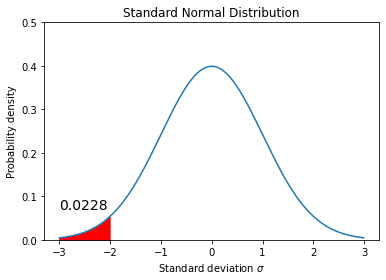

In [6]:
#collapse
fig, ax= plt.subplots()
x_domain = np.arange(-3, 3, 0.01)
norm = scipy.stats.norm(loc = 0, scale = 1)
y = norm.pdf(x_domain)

ax.plot(x_domain, y)
ax.axvline(x= -2, ymax = norm.pdf(95)/0.1)

section = np.arange(-3, -2, 0.01)
ax.fill_between(section,norm.pdf(section), color = 'red')
ax.text(-3, 0.07,round(norm.cdf(-2),4), fontsize = 14)

ax.set_ylim(0, 0.5)
ax.set_xlabel('Standard deviation $\sigma$')
ax.set_ylabel('Probability density')
ax.set_title('Standard Normal Distribution');

**Caveats**

1) In order to use z-score, **you need a good approximation of population mean and standard derivation.** This may not be the case. If your you don't have a very good estimation of population standard deviation, you should use one sample t-test rather than z-test

2) Similarly, if you are compariing two groups, you should use tests such as two sample t-test. If you are comparing two groups of cancer patients (novel treatment group vs control group), we are not comparing with a group against the entire population. We are comapring between two groups.

2) Even if your new cancer treatment produces better clinical outcome compare to the entire population of cancer patients globally, it does not mean much. You want to have a strict control over the variables that might affect the outcome such as patient ethnicity, underlying medical conditions and the choice of treatment. As a result, many scientific research use t-test which allows the comparison between two groups of samples. Also, there are test you can use to compare more than 2 groups such as ANOVA test.

# Example Time

Now let's take a look at a real world dataset. Below is the distribution of disposable household income in the UK in 2020 [(source)](https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/bulletins/householddisposableincomeandinequality/financialyear2020).

In [7]:
#hide
#Read CSV file
path = 'dataset/uk_income_distribution_2020.xlsx'
df = pd.read_excel(path)
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.columns = ['Income_band', 'Count(1000s)']

#The data provides household count. Procedure to make each row represents a sample.
dist_df = pd.DataFrame()
for i, j in df.iterrows():
    temp_df = pd.DataFrame((random.choices(range(int(j['Income_band']), int(j['Income_band']+1000)), k= int(j['Count(1000s)']))))
    dist_df = pd.concat([dist_df, temp_df])
dist_df.columns = ['income']

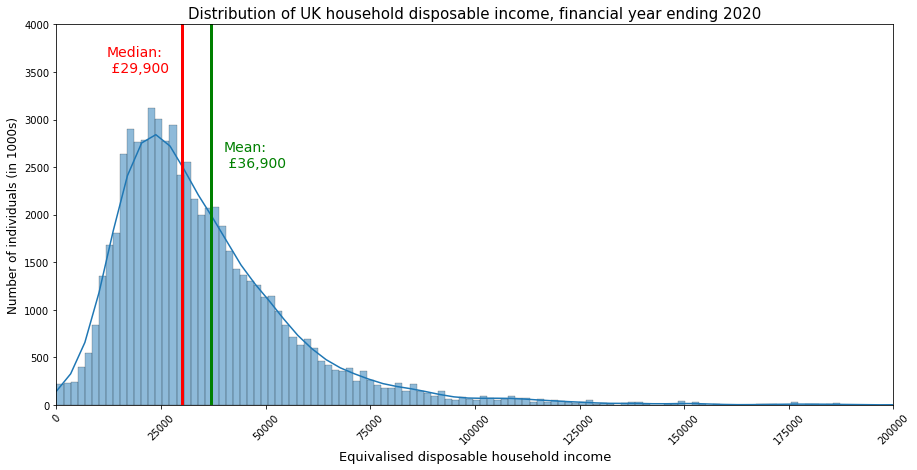

In [8]:
#collapse
plt.figure(figsize=(15, 7))
ax = sns.histplot(dist_df, bins = 400, legend = False, kde = True)
plt.axvline(29900, color = 'red', lw = 3)
plt.axvline(36900, color = 'green', lw = 3)
#tick_spacing = 10000
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation = 45)
plt.xlim(0, 200000)
plt.ylim(0, 4000)
plt.title('Distribution of UK household disposable income, financial year ending 2020', fontsize = 15)
plt.xlabel('Equivalised disposable household income', fontsize=13)
plt.ylabel('Number of individuals (in 1000s)', fontsize = 12)

plt.text(12000, 3500, 'Median:\n £29,900', fontsize = 14, color = 'red')
plt.text(40000, 2500, 'Mean:\n £36,900', fontsize = 14, color = 'green');

From the first glance we can notice that the distribution 
- does not follow normal distribution (unsymmetrical, highly skewed),
- is positively (right) skewed (mean < median).

Let's look at some basic statistics.

In [9]:
print('Median: ', np.median(dist_df['income']))
dist_df.describe()

Median:  30469.5


,income
count,65614.000000
mean,37496.055461
std,36260.932412
min,4.000000
25%,20706.250000
50%,30469.500000
75%,44731.750000
max,674891.000000


1. The data count represents about 65 million individuals (1 count for 1000 individuals). The entire population of the UK is about 67 million, so we have the data on almost the entire population.

2. Mean is larger than median, indicating positive skew.

3. Standard deviation is about £36,260.

Let's check the skewness and kurtosis to check how far the distribution is from normal distribution.

In [10]:
print('Skewness: ',scipy.stats.skew(dist_df['income']))
print('Kurtosis: ',scipy.stats.kurtosis(dist_df['income']))

Skewness:  7.790516879065766
Kurtosis:  92.99649511424367


Skewness and kurtosis are far from 0. The distribution is clearly not normal.

### Sample size and CLT

Now let's see how we can use CLT to converge to normal distribution.

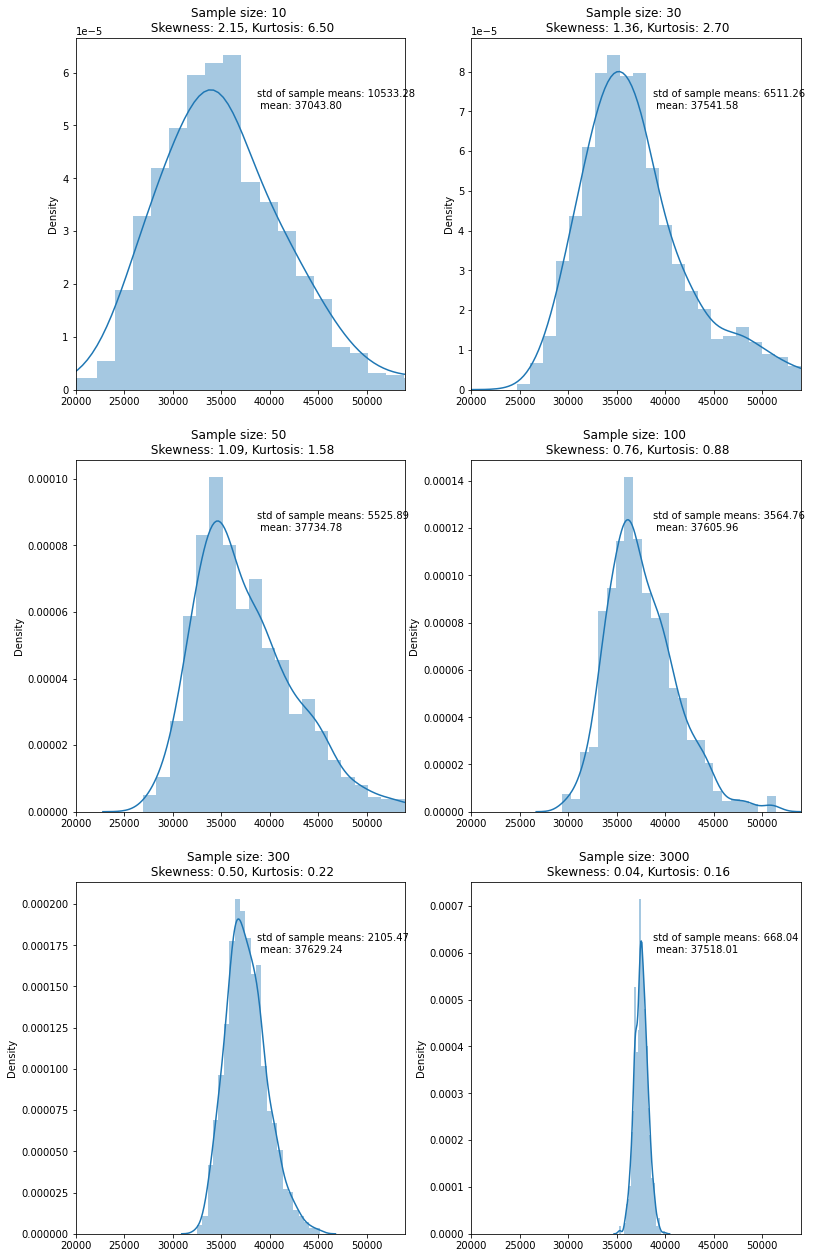

In [11]:
#collapse
fig ,axs = plt.subplots(3, 2, figsize = (13, 22))
sample_sizes = [10, 30, 50, 100, 300, 3000]
trial = 1000

for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample_mean = []
    for i in (range(trial)):
        temp_list = random.choices(list(dist_df['income']), k = sample_size)
        sample_mean.append(np.mean(temp_list))
    sns.distplot(sample_mean, ax=ax)
    skew = scipy.stats.skew(sample_mean)
    kurtosis = scipy.stats.kurtosis(sample_mean)
    std = np.std(sample_mean)
    mean = np.mean(sample_mean)
    
    ax.set_xlim(20000, 54000)

    ax.set_label
    
    ax.set_title('Sample size: %d \n Skewness: %.2f, Kurtosis: %.2f' %(sample_size, skew, kurtosis))
    
    x0, xmax = ax.set_xlim()
    y0, ymax = ax.set_ylim()
    data_width = xmax - x0
    data_height = ymax - y0
    ax.text(x0 + data_width * 0.55, y0 + data_height * 0.8, 'std of sample means: %.2f \n mean: %.2f' %(std, mean), fontsize = 10)

6 samples sizes are used to draw random samples 1000 times and the mean of each sample is plotted in histograms.

1) As the sample size increases, the distribution more closely converges to normal distribution. You can see how skewness and kurtosis approach 0 with increasing sample size.

2) While mean stays relatively constant, standard deviation decreases with increasing sample size. 
    Concretely, sample mean standard deviation can be estimated from sample size and population standard deviation:
    
$$
\text{standard error} = \frac{\sigma}{\sqrt{n}}
$$
where $\text{standard error}$ is approximate standard deviation of a sample population, $\sigma$ and $n$ are population standard deviation and sample size respectively.

Recall that our population std was about 36,500. Let's calculate the standard error for sample size of 3,000  and compare to our empirical standard deviation of sample population.

In [12]:
standard_error = np.std(dist_df['income']) / np.sqrt(3000)
print(standard_error)

662.0259763627873


Standard error is 662 while the empirical value is 656. This is a pretty good approximation. Let's use the standard error with sample size 3000 for our probablistic interpretation!

### Z Score and Probablistic Interpretation

Instead of using the original distribution which was highly skewed, we can now use a nice normal distribution for probablistic interpretation. Our normal distribution can be expressed defined by its mean and standard error.
$$
x \backsim N(37530, 656^2)
$$

Let's say you surveyed the disposable income fo 3000 people randomly. The mean of the sample population was £39000. Let's check its how significant it is using z-score.

$$
\begin{align}
Z & = \frac{x-\mu}{\sigma}\\
& = \frac{39000-37530}{656}\\
& \approx 2.24
\end{align}
$$

Your observation is 2.24 standard deviations away from mean! It is actually very unlikely to suvey 3000 people and get the average of 39000!

In [13]:
#collapse
norm = scipy.stats.norm(loc = 0, scale = 1)
x_domain = np.arange(-4, 4, 0.01)
y = norm.pdf(x_domain)
cdf = norm.cdf(x_domain)
norm_df = pd.DataFrame()
norm_df['x'] = x_domain
norm_df['y'] = y
norm_df['cdf'] = cdf

In [14]:
#collapse
slider = alt.binding_range(min=-4, max=4, step=0.1, name='Z score:')
selector = alt.selection_single(name="SelectorName", fields=['cutoff'],
                                bind=slider, init={'cutoff': -2.2})

chart_pdf = alt.Chart(norm_df).mark_bar().encode(
            alt.X('x:Q', title = 'Standard deviation'),
            alt.Y('y:Q', title = 'Probability density'),
            color = alt.condition(
                alt.datum.x <= selector.cutoff,
                alt.value('navy'),
                alt.value('lightgray')
                )
            ).add_selection(
                selector
            ).properties(
                title='Probability distribution function'
            )

chart_cdf = alt.Chart(norm_df).mark_bar().encode(
            alt.X('x:Q', title = 'Standard deviation'),
            alt.Y('cdf:Q', title = 'cumulative probability distribution'),
            color = alt.condition(
                alt.datum.x <= selector.cutoff,
                alt.value('navy'),
                alt.value('lightgray')
                )
            ).add_selection(
                selector
            ).properties(
                title = 'cumulative distribution function'
            )

chart_pdf|chart_cdf

alt.HConcatChart(...)

You can use the above interactive chart to play with z score and see how the cumulative probability distribution changes.

In [15]:
norm = scipy.stats.norm(loc = 0, scale = 1)
norm.cdf(-2.24)*2

0.025090922871893125

From the culumative distribution function, we know that the probability of getting a sample mean further than 2.24 stds away from mean is only 2.5%.

So what does that imply?

1) It means you got a truly unlikely result only if you have truly randomly sampled from the entire population.

2) If you have only sampled from your neighborhood and thereby imposed control over your sample population, it can be a good reason to reject the null hypothesis and conclude that the difference between the income in your neightborhood is significantly different than the national average.

**Null hypothesis**: The average income in your neighborhood does not differ from the national average.

**Alternative hypothesis**: The average income in your neighborhood differ from the national average.

You can reject the null hypothesis with the p-value of 0.025. This means if the null hypothesis holds, there is only 2.5% chance of getting a result such as yours by pure chance.
   